<a href="https://nbviewer.jupyter.org/github/alisonmitchell/Stock-Prediction/blob/main/Technical_Analysis/Trading_Dashboards.ipynb" 
   target="_parent">
   <img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" 
      width="109" height="20" alt="render in nbviewer">
</a>

# Trading Dashboards

## 1. Introduction

Historical stock market data from Yahoo! Finance will be used to build dashboards showing various performance metrics for a single stock: AstraZeneca (AZN.L), and a portofolio of stocks: Unilever (ULVR.L), Royal Dutch Shell (RSDB.L), GlaxoSmithKline (GSK.L), AstraZeneca (AZN.L), HSBC (HSBA.L) and BP (BP.L).

## 2. Install/import libraries

In [36]:
!pip install yfinance
!pip install hvplot

In [11]:
import yfinance as yf

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import plotly.graph_objects as go
import hvplot.pandas
import holoviews as hv

import datetime
from datetime import date, timedelta

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 3. Download data with Yfinance API

Download historical data for AstraZeneca (AZN.L) for 2010-2019.

In [12]:
# Data for AstraZeneca (AZN.L)
azn = yf.Ticker("AZN.L")

In [17]:
# Download data for 2010-2019
azn_historical =  pd.read_pickle("../ftse100_stocks.pkl")
type(azn_historical)

pandas.core.frame.DataFrame

In [14]:
azn_historical

ULVR.L                                                           \
              Open         High          Low   Close    Adj Close    Volume   
Date                                                                          
2013-01-02  2396.0  2403.000000  2380.000000  2392.0  1668.717041   1761986   
2013-01-03  2397.0  2400.000000  2380.000000  2399.0  1673.599609   1253963   
2013-01-04  2393.0  2415.241943  2389.000000  2415.0  1684.762329   2138511   
2013-01-07  2414.0  2419.000000  2394.000000  2398.0  1672.902344   1453249   
2013-01-08  2394.0  2412.000000  2393.000000  2411.0  1681.972168   2174162   
...            ...          ...          ...     ...          ...       ...   
2023-10-03  4042.0  4074.500000  4040.500000  4053.5  4053.500000   4012449   
2023-10-04  4038.0  4058.500000  4004.774902  4012.5  4012.500000   8063805   
2023-10-05  4029.0  4061.500000  4021.500000  4030.5  4030.500000   3088352   
2023-10-06  4031.0  4036.000000  3886.000000  3925.5  3925.500000  14591449   
2023-10-09  3929.5  3954.500000  3906.500000  3909.5  3909.500000   5172128   

                  GSK.L                                         ...  \
                   Open         High          Low        Close  ...   
Date                                                            ...   
2013-01-02  1349.859253  1380.816406  1346.837158  1368.495361  ...   
2013-01-03  1370.006470  1378.229492  1364.969727  1373.532227  ...   
2013-01-04  1385.116821  1392.168335  1375.043335  1391.664673  ...   
2013-01-07  1388.138916  1390.013550  1381.087402  1382.094849  ...   
2013-01-08  1381.591064  1393.306641  1380.080078  1383.605835  ...   
...                 ...          ...          ...          ...  ...   
2023-10-03  1488.599976  1504.000000  1479.400024  1485.199951  ...   
2023-10-04  1480.400024  1497.400024  1474.000000  1486.800049  ...   
2023-10-05  1485.199951  1491.599976  1471.400024  1483.000000  ...   
2023-10-06  1494.599976  1503.400024  1470.199951  1499.400024  ...   
2023-10-09  1502.000000  1521.000000  1498.599976  1508.199951  ...   

                   AZN.L                                      HSBA.L  \
                     Low    Close     Adj Close   Volume        Open   
Date                                                                   
2013-01-02   2923.000000   2969.0   1974.841675  2394731  656.900024   
2013-01-03   2952.500000   2980.0   1982.158203  1763172  663.000000   
2013-01-04   2975.211914   3000.0   1995.461304  2041101  660.700012   
2013-01-07   2976.000000   2985.0   1985.483765  1185261  669.799988   
2013-01-08   2958.500000   3000.0   1995.461304  2723178  662.500000   
...                  ...      ...           ...      ...         ...   
2023-10-03  10884.000000  10908.0  10908.000000  1297146  637.799988   
2023-10-04  10790.000000  10892.0  10892.000000  2200732  642.299988   
2023-10-05  10858.000000  10902.0  10902.000000  1102217  642.000000   
2023-10-06  10858.000000  10942.0  10942.000000  1250802  649.599976   
2023-10-09  10810.000000  10856.0  10856.000000  2558599  651.400024   

                                                                      
                  High         Low       Close   Adj Close    Volume  
Date                                                                  
2013-01-02  667.799988  655.599976  665.700012  367.080658  18045934  
2013-01-03  664.599976  660.799988  662.500000  365.316071  10831799  
2013-01-04  668.700012  660.000000  667.599976  368.128357  16019794  
2013-01-07  673.299988  665.900024  666.200012  367.356293  14748401  
2013-01-08  664.392029  659.200012  659.200012  363.496521  19186720  
...                ...         ...         ...         ...       ...  
2023-10-03  656.500000  636.299988  645.200012  634.575928  25649014  
2023-10-04  647.400024  639.000000  640.500000  629.953308  35708961  
2023-10-05  649.799988  636.799988  644.500000  633.887451  21812777  
2023-10-06  657.700012  642.000000  654.700012  6

In [20]:
signals_df = azn_historical[('ULVR.L', 'Close')].to_frame().join(azn_historical[('GSK.L', 'Close')].to_frame(), lsuffix='_ULVR', rsuffix='_GSK').join(azn_historical[('AZN.L', 'Close')].to_frame(), rsuffix='_AZN').join(azn_historical[('HSBA.L', 'Close')].to_frame(), rsuffix='_HSBA')

## 4. Simple Moving Average Crossover Strategy

The moving average crossover trading strategy will be to take two moving averages - 50-day (fast) and 100-day (slow) - and to go long (buy) when the fast MA goes above the slow MA and to go short (sell) when the fast MA goes below the slow MA.

### 4.1 Generate moving averages and trading signals

The trading signals will be set as 0 (sell) or 1 (buy).

In [43]:
# 50 and 100 day SMA

short_window = 50
long_window = 100

# Assuming 'ULVR.L' is the stock symbol you are interested in
def update_signals_df(stock_symbol):
    # Generate the short and long moving averages (50 and 100 days, respectively)
    signals_df[(stock_symbol, 'SMA50')] = signals_df[(stock_symbol, 'Close')].rolling(window=short_window).mean()
    signals_df[(stock_symbol, 'SMA100')] = signals_df[(stock_symbol, 'Close')].rolling(window=long_window).mean()
    signals_df[(stock_symbol, 'Signal')] = 0.0

    # Generate the trading signal 0 or 1,
    # where 0 is when the SMA50 is under the SMA100, and
    # where 1 is when the SMA50 is higher (or crosses over) the SMA100
    signals_df[(stock_symbol, 'Signal')][short_window:] = np.where(
        signals_df[(stock_symbol, 'SMA50')][short_window:] > signals_df[(stock_symbol, 'SMA100')][short_window:], 1.0, 0.0
    )

    # Calculate the points in time at which a position should be taken, 1 or -1
    signals_df[(stock_symbol, 'Entry/Exit')] = signals_df[(stock_symbol, 'Signal')].diff()

stock_names = ['ULVR.L', 'GSK.L', 'AZN.L', 'HSBA.L']
update_signals_df(stock_names[0])
update_signals_df(stock_names[1])
update_signals_df(stock_names[2])
update_signals_df(stock_names[3])

signals_df['Entry/Exit'] == -1.0

KeyError: 'Entry/Exit'

### 4.2 Plot Moving Averages and Entry/Exit indicators

Plot the moving averages and entry/exit positions using hvPlot, an interactive Bokeh-based plotting API.

In [31]:
# Colab rendering requires reloading extension in each cell

def _render(self, **kw):
  hv.extension('bokeh')
  return hv.Store.render(self)
hv.core.Dimensioned._repr_mimebundle_ = _render

In [41]:
# Visualise exit position relative to close price
exit = signals_df[signals_df['Entry/Exit'] == -1.0]['Close'].hvplot.scatter(
    color='red',
    legend=False,
    ylabel='Price',
    marker = 'v',
    width=1000,
    height=400
)

# Visualise entry position relative to close price
entry = signals_df[signals_df['Entry/Exit'] == 1.0]['Close'].hvplot.scatter(
    color='green',
    legend=False,
    ylabel='Price',
    marker = '^',
    width=1000,
    height=400
)

# Visualise close price for the investment
security_close = signals_df[['Close']].hvplot(
    line_color='lightgray',
    ylabel='Price',
    width=1000,
    height=400
)

# Visualise moving averages
moving_avgs = signals_df[['SMA50', 'SMA100']].hvplot(
    ylabel='Price',
    width=1000,
    height=400
)

# Overlay plots
entry_exit_plot = security_close * moving_avgs * entry * exit
entry_exit_plot.opts(xaxis=None)


KeyError: 'Signal'

### 4.3 Set initial investment stake of capital and number of shares.

Here we will set £100,000 and we want to buy 500 shares of AstraZeneca.

In [8]:
# set an initial investment stake of capital and set the number of shares - here 500 shares of AZN.L
# Set initial capital
initial_capital = float(1000000)

# Set the share size
share_size = 500

# Take a 500 share position where the dual moving average crossover is 1 (SMA50 is greater than SMA100)
signals_df['Position'] = share_size * signals_df['Signal']

# Find the points in time where a 500 share position is bought or sold
signals_df['Entry/Exit Position'] = signals_df['Position'].diff()

# Multiply share price by entry/exit positions and get the cumulatively sum
signals_df['Portfolio Holdings'] = signals_df['Close'] * signals_df['Entry/Exit Position'].cumsum()

# Subtract the initial capital by the portfolio holdings to get the amount of liquid cash in the portfolio
signals_df['Portfolio Cash'] = initial_capital - (signals_df['Close'] * signals_df['Entry/Exit Position']).cumsum()

# Get the total portfolio value by adding the cash amount by the portfolio holdings (or investments)
signals_df['Portfolio Total'] = signals_df['Portfolio Cash'] + signals_df['Portfolio Holdings']

# Calculate the portfolio daily returns
signals_df['Portfolio Daily Returns'] = signals_df['Portfolio Total'].pct_change()

# Calculate the cumulative returns
signals_df['Portfolio Cumulative Returns'] = (1 + signals_df['Portfolio Daily Returns']).cumprod() - 1

# Print the DataFrame
signals_df.tail(10)

,Close,SMA50,SMA100,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
Date,,,,,,,,,,,,
2022-12-15,11360.0,10616.14,10592.01,1.0,1.0,500.0,500.0,5680000.0,-4437500.0,1242500.0,0.000000,0.2425
2022-12-16,11156.0,10638.66,10593.95,1.0,0.0,500.0,0.0,5578000.0,-4437500.0,1140500.0,-0.082093,0.1405
2022-12-19,11108.0,10664.30,10596.33,1.0,0.0,500.0,0.0,5554000.0,-4437500.0,1116500.0,-0.021043,0.1165
2022-12-20,11126.0,10690.32,10599.15,1.0,0.0,500.0,0.0,5563000.0,-4437500.0,1125500.0,0.008061,0.1255
2022-12-21,11244.0,10716.50,10604.51,1.0,0.0,500.0,0.0,5622000.0,-4437500.0,1184500.0,0.052421,0.1845
2022-12-22,11306.0,10747.02,10609.77,1.0,0.0,500.0,0.0,5653000.0,-4437500.0,1215500.0,0.026171,0.2155
2022-12-23,11238.0,10775.42,10615.53,1.0,0.0,500.0,0.0,5619000.0,-4437500.0,1181500.0,-0.027972,0.1815
2022-12-28,11250.0,10803.18,10620.83,1.0,0.0,500.0,0.0,5625000.0,-4437500.0,1187500.0,0.005078,0.1875
2022-12-29,11348.0,10833.26,10625.65,1.0,0.0,500.0,0.0,5674000.0,-4437500.0,1236500.0,0.041263,0.2365


### 4.4 Visualise the Entry and Exit positions relative to our portfolio

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
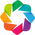

:Overlay
   .Curve.I                    :Curve   [Date]   (Portfolio Total)
   .Scatter.Portfolio_Total.I  :Scatter   [Date]   (Portfolio Total)
   .Scatter.Portfolio_Total.II :Scatter   [Date]   (Portfolio Total)

In [9]:
# Visualise exit position relative to total portfolio value
exit = signals_df[signals_df['Entry/Exit'] == -1.0]['Portfolio Total'].hvplot.scatter(
    color='red',
    legend=False,
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)

# Visualise entry position relative to total portfolio value
entry = signals_df[signals_df['Entry/Exit'] == 1.0]['Portfolio Total'].hvplot.scatter(
    color='green',
    legend=False,
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)

# Visualise total portfolio value for the investment
total_portfolio_value = signals_df[['Portfolio Total']].hvplot(
    line_color='lightgray',
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)

# Overlay plots
portfolio_entry_exit_plot = total_portfolio_value * entry * exit
portfolio_entry_exit_plot.opts(xaxis=None)

## 5. Backtesting

Before using the strategy we will evaluate the quality of it first by backtesting, or looking at how profitable it is on historical data. 

### 5.1 Define metrics
There are many indicators for measuring performance. Here we will use the following:

1.   **Cumulative return** — return on the investment in total
2.   **Annual return** — return on investment received that year
3.   **Annual volatility** — daily volatility times the square root of 252 trading days.
4.   **Sharpe ratio** — measures the performance of an investment compared to a risk-free asset, after adjusting for its risk, or in other words, the excess return relative to the risk taken.
This is the most commonly used ratio of risk-adjusted profitability. The higher the Sharpe ratio the better the strategy (>1 is desirable, <1 and >0 suggests that the risks taken might be excessive for that level of return, and <0 means that the return generated is lower than the risk-free, hence, an investment in a risk-free security provides better results. The formula is: $Sharpe$  $Ratio$  = $\frac{return - rf}{σ}$ 
5.   **Sortino ratio** — differentiates harmful volatility from total overall volatility by using the asset’s standard deviation of negative portfolio returns, downside deviation, instead of the total standard deviation of portfolio returns including positive ones (as opposed to the Sharpe ratio). A Sortino ratio of 2 is considered adequate. The formula is: $Sortino$  $Ratio$  = $\frac{return - rf}{\text{volatility } \text{of } \text{negative } \text{returns}}$ 

A good rule of thumb is to use the Sharpe ratio when evaluating low-volatility investments and the Sortino ratio for high-volatility investments.





In [10]:
# Prepare DataFrame for metrics
metrics = [
    'Annual Return',
    'Cumulative Returns',
    'Annual Volatility',
    'Sharpe Ratio',
    'Sortino Ratio']

columns = ['Backtest']

# Initialise the DataFrame with index set to evaluation metrics and column as 'Backtest' 
portfolio_evaluation_df = pd.DataFrame(index=metrics, columns=columns)
portfolio_evaluation_df

,Backtest
Annual Return,NaN
Cumulative Returns,NaN
Annual Volatility,NaN
Sharpe Ratio,NaN
Sortino Ratio,NaN


### 5.2 Perform Backtest

Calculate metrics for indicators.

In [11]:
# Calculate cumulative return
portfolio_evaluation_df.loc['Cumulative Returns'] = signals_df['Portfolio Cumulative Returns'][-1]

# Calculate annualised return
portfolio_evaluation_df.loc['Annual Return'] = (
    signals_df['Portfolio Daily Returns'].mean() * 252
)

# Calculate annual volatility
portfolio_evaluation_df.loc['Annual Volatility'] = (
    signals_df['Portfolio Daily Returns'].std() * np.sqrt(252)
)

# Calculate Sharpe Ratio
portfolio_evaluation_df.loc['Sharpe Ratio'] = (
    signals_df['Portfolio Daily Returns'].mean() * 252) / (
    signals_df['Portfolio Daily Returns'].std() * np.sqrt(252)
)

# Calculate Downside Return
sortino_ratio_df = signals_df[['Portfolio Daily Returns']].copy()
sortino_ratio_df.loc[:,'Downside Returns'] = 0

target = 0
mask = sortino_ratio_df['Portfolio Daily Returns'] < target
sortino_ratio_df.loc[mask, 'Downside Returns'] = sortino_ratio_df['Portfolio Daily Returns']**2
portfolio_evaluation_df

# Calculate Sortino Ratio
down_stdev = np.sqrt(sortino_ratio_df['Downside Returns'].mean()) * np.sqrt(252)
expected_return = sortino_ratio_df['Portfolio Daily Returns'].mean() * 252
sortino_ratio = expected_return/down_stdev

portfolio_evaluation_df.loc['Sortino Ratio'] = sortino_ratio
portfolio_evaluation_df.head()

,Backtest
Annual Return,0.218982
Cumulative Returns,0.1715
Annual Volatility,0.641173
Sharpe Ratio,0.341534
Sortino Ratio,0.518305


In [12]:
# Initialise trade evaluation DataFrame with columns
trade_evaluation_df = pd.DataFrame(
    columns=[
        'Stock', 
        'Entry Date', 
        'Exit Date', 
        'Shares', 
        'Entry Share Price', 
        'Exit Share Price', 
        'Entry Portfolio Holding', 
        'Exit Portfolio Holding', 
        'Profit/Loss']
)

trade_evaluation_df

,Stock,Entry Date,Exit Date,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss


In [13]:
# Initialise iterative variables
entry_date = ''
exit_date = ''
entry_portfolio_holding = 0
exit_portfolio_holding = 0
share_size = 0
entry_share_price = 0
exit_share_price = 0

# Loop through signal DataFrame
# If 'Entry/Exit' is 1, set entry trade metrics
# Else if 'Entry/Exit' is -1, set exit trade metrics and calculate profit,
# Then append the record to the trade evaluation DataFrame
for index, row in signals_df.iterrows():
    if row['Entry/Exit'] == 1:
        entry_date = index
        entry_portfolio_holding = abs(row['Portfolio Holdings'])
        share_size = row['Entry/Exit Position']
        entry_share_price = row['Close']

    elif row['Entry/Exit'] == -1:
        exit_date = index
        exit_portfolio_holding = abs(row['Close'] * row['Entry/Exit Position'])
        exit_share_price = row['Close']
        profit_loss =  entry_portfolio_holding - exit_portfolio_holding
        trade_evaluation_df = trade_evaluation_df.append(
            {
                'Stock': 'AZN.L',
                'Entry Date': entry_date,
                'Exit Date': exit_date,
                'Shares': share_size,
                'Entry Share Price': entry_share_price,
                'Exit Share Price': exit_share_price,
                'Entry Portfolio Holding': entry_portfolio_holding,
                'Exit Portfolio Holding': exit_portfolio_holding,
                'Profit/Loss': profit_loss
            },
            ignore_index=True)

# Print the DataFrame
trade_evaluation_df

,Stock,Entry Date,Exit Date,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss
0,AZN.L,2013-05-24 00:00:00,2013-07-31 00:00:00,500.0,3428.0,3335.0,1714000.0,1667500.0,46500.0
1,AZN.L,2013-11-22 00:00:00,2014-09-03 00:00:00,500.0,3446.5,4577.0,1723250.0,2288500.0,-565250.0
2,AZN.L,2014-09-29 00:00:00,2015-03-10 00:00:00,500.0,4446.0,4272.0,2223000.0,2136000.0,87000.0
3,AZN.L,2015-04-24 00:00:00,2015-06-05 00:00:00,500.0,4749.5,4367.5,2374750.0,2183750.0,191000.0
4,AZN.L,2015-12-07 00:00:00,2016-03-03 00:00:00,500.0,4483.5,4000.0,2241750.0,2000000.0,241750.0
5,AZN.L,2016-07-12 00:00:00,2016-11-17 00:00:00,500.0,4476.0,4340.0,2238000.0,2170000.0,68000.0
6,AZN.L,2017-03-02 00:00:00,2017-08-21 00:00:00,500.0,4747.0,4418.0,2373500.0,2209000.0,164500.0
7,AZN.L,2017-11-02 00:00:00,2018-01-23 00:00:00,500.0,5152.0,5101.0,2576000.0,2550500.0,25500.0
8,AZN.L,2018-05-11 00:00:00,2019-02-01 00:00:00,500.0,5279.0,5581.0,2639500.0,2790500.0,-151000.0
9,AZN.L,2019-03-28 00:00:00,2019-06-10 00:00:00,500.0,6496.0,6104.0,3248000.0,3052000.0,196000.0


### 5.3 Plot results of backtest

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
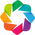

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [15]:
price_df = signals_df[['Close', 'SMA50', 'SMA100']]
price_chart = price_df.hvplot.line()
price_chart.opts(title='AZN.L',xaxis=None)

### 5.4 Print dashboard

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
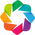

:Table   [index,Backtest]

In [16]:
portfolio_evaluation_df.reset_index(inplace=True)
portfolio_evaluation_table = portfolio_evaluation_df.hvplot.table()
portfolio_evaluation_table

## 6. Trading Dashboard using multiple stock tickers

### 6.1 Data collection 

Download three years of FTSE 100 stock data from Yahoo! Finance for 2017-2019 using yfinance API and store in a pandas DataFrame. The stocks chosen are Unilever (ULVR.L), Royal Dutch Shell (RSDB.L), GlaxoSmithKline (GSK.L), AstraZeneca (AZN.L), HSBC (HSBA.L) and BP (BP.L) representing a selection of different industries - pharmaceuticals, oil and finance.

In [17]:
ftse100_stocks = yf.download("AZN.L GSK.L ULVR.L BP.L HSBA.L", start=datetime.datetime(2020, 1, 1), 
                                     end=datetime.datetime(2023, 1, 1), group_by='tickers')
ftse100_stocks

[*********************100%%**********************]  5 of 5 completed


BP.L                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2020-01-02  475.100006  483.769989  475.100006  480.850006  386.822357   
2020-01-03  486.200012  494.950012  485.134003  494.049988  397.441162   
2020-01-06  500.000000  508.429993  494.100006  504.100006  405.525909   
2020-01-07  505.000000  505.500000  498.649994  498.799988  401.262390   
2020-01-08  501.500000  501.919006  492.399994  494.299988  397.642242   
...                ...         ...         ...         ...         ...   
2022-12-22  482.100006  485.066010  476.500000  477.899994  455.510620   
2022-12-23  475.000000  478.899994  473.750000  478.899994  456.463806   
2022-12-28  487.750000  489.950012  477.250000  480.399994  457.893463   
2022-12-29  474.200012  480.850006  472.799988  480.750000  458.227112   
2022-12-30  478.450012  480.500000  474.899994  474.899994  452.651154   

                            HSBA.L                                      ...  \
                Volume        Open        High         Low       Close  ...   
Date                                                                    ...   
2020-01-02  25049010.0  589.000000  598.000000  588.700012  595.099976  ...   
2020-01-03  42354025.0  592.500000  602.026001  586.799988  594.400024  ...   
2020-01-06  47220192.0  590.000000  592.450012  580.799988  585.200012  ...   
2020-01-07  46243068.0  587.900024  588.000000  582.599976  583.400024  ...   
2020-01-08  37974090.0  580.500000  582.599976  576.299988  581.299988  ...   
...                ...         ...         ...         ...         ...  ...   
2022-12-22  57397378.0  512.700012  516.099976  510.600006  512.299988  ...   
2022-12-23  62024066.0  511.399994  513.299988  508.899994  510.299988  ...   
2022-12-28  61058866.0  515.299988  520.700012  510.700012  518.000000  ...   
2022-12-29  15838786.0  516.900024  520.150024  514.400024  518.799988  ...   
2022-12-30  12498129.0  516.900024  519.200012  515.599976  515.700012  ...   

                  GSK.L                                        AZN.L           \
                    Low        Close    Adj Close    Volume     Open     High   
Date                                                                            
2020-01-02  1790.276123  1790.276123  1448.703491   5240867   7595.0   7670.0   
2020-01-03  1776.173096  1797.529053  1454.572632   4363611   7625.0   7700.0   
2020-01-06  1767.151245  1783.426147  1443.160645   5519354   7669.0   7680.0   
2020-01-07  1765.696655  1775.367188  1436.639160   5204425   7608.0   7665.0   
2020-01-08  1762.674561  1784.232056  1443.812378   5402486   7617.0   7669.0   
...                 ...          ...          ...       ...      ...      ...   
2022-12-22  1448.199951  1454.800049  1412.732056  10415831  11236.0  11368.0   
2022-12-23  1449.199951  1452.800049  1410.789795   7469337  11290.0  11328.0   
2022-12-28  1438.000000  1440.199951  1398.554077   3483984  11264.0  11284.0   
2022-12-29  1419.400024  1444.599976  1402.826904   2790171  11244.0  11356.0   
2022-12-30  1434.199951  1437.599976  1396.029419   2018211  11292.0  11326.0   

                                                          
                     Low    Close     Adj Close   Volume  
Date                                                      
2020-01-02   7565.000000   7660.0   6934.687500  1704325  
2020-01-03   7580.919922   7700.0   6970.899414  1090818  
2020-01-06   7546.000000   7623.0   6901.190918  1348181  
2020-01-07   7563.000000   7645.0   6921.107910  1308820  
2020-01-08   7579.000000   7626.0   6903.907227  1256533  
...                  ...      ...           ...      ...  
2022-12-22  11202.000000  11306.0  11074.377930  2227678  
2022-12-23  11206.000000  11238.0  11007.771484   440196  
2022-12-28  11186.000000  11250.0  11019.525391  1027336  
2022-12-29  11166.000000  11348

In [18]:
ulvr_historical =  ftse100_stocks['ULVR.L']
bp_historical =  ftse100_stocks['BP.L']
azn_historical =  ftse100_stocks['AZN.L']
gsk_historical =  ftse100_stocks['GSK.L']
hsbc_historical =  ftse100_stocks['HSBA.L']

In [19]:
# DataFrame of the closing price of selected stocks

ftse100_stocks_close = pd.DataFrame({"ULVR.L": ulvr_historical.Close,
                                "BP.L": bp_historical.Close,
                                "AZN.L": azn_historical.Close,
                                "GSK.L": gsk_historical.Close,
                                "HBSA.L": hsbc_historical.Close
                                })
ftse100_stocks_close.head()

,ULVR.L,BP.L,AZN.L,GSK.L,HBSA.L
Date,,,,,
2020-01-02,4347.0,480.850006,7660.0,1790.276123,595.099976
2020-01-03,4357.0,494.049988,7700.0,1797.529053,594.400024
2020-01-06,4324.5,504.100006,7623.0,1783.426147,585.200012
2020-01-07,4287.5,498.799988,7645.0,1775.367188,583.400024
2020-01-08,4240.0,494.299988,7626.0,1784.232056,581.299988


## 7. Calculate daily returns

### 7.1 Data transformation 

To be able to plot the daily stock returns we will transform the data by calculating the daily percentage change directly using the pandas **'pct_change()'** method which computes the percentage change from the previous row by default.



In [20]:
# Create dataframe to contain returns for each company's stock to plot the change of each stock per day

returns = pd.DataFrame()

In [21]:
# pandas pct_change() method on the Close column to create a column representing return value

tickers = ['AZN.L', 'GSK.L', 'ULVR.L', 'BP.L', 'HSBA.L']
for ticker in tickers:
    returns[ticker] = ftse100_stocks[ticker].Close.pct_change() * 100

returns

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.522193,0.405129,0.230044,2.745135,-0.117619
2020-01-06,-1.000000,-0.784572,-0.745926,2.034211,-1.547781
2020-01-07,0.288600,-0.451881,-0.855590,-1.051382,-0.307585
2020-01-08,-0.248528,0.499326,-1.107872,-0.902165,-0.359965
...,...,...,...,...,...
2022-12-22,0.551405,0.110109,-0.284024,-0.437501,0.195580
2022-12-23,-0.601451,-0.137476,0.023736,0.209249,-0.390396
2022-12-28,0.106781,-0.867297,-0.201709,0.313218,1.508919


In [22]:
# Clean up the data by dropping the first value which becomes a 'NaN' as there is no price change from the day before.

returns.dropna(inplace=True)
returns.head()

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
Date,,,,,
2020-01-03,0.522193,0.405129,0.230044,2.745135,-0.117619
2020-01-06,-1.000000,-0.784572,-0.745926,2.034211,-1.547781
2020-01-07,0.288600,-0.451881,-0.855590,-1.051382,-0.307585
2020-01-08,-0.248528,0.499326,-1.107872,-0.902165,-0.359965
2020-01-09,0.721217,1.072718,0.966981,-0.455189,1.169790


### 7.2 Plot Daily returns

Text(0, 0.5, 'Returns (%)')

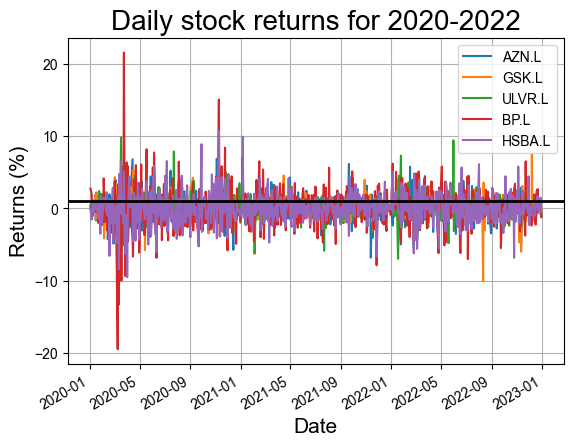

In [23]:
# Plot returns for 2020-2022

returns.plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Daily stock returns for 2020-2022', color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15)

## 8. Cumulative returns

The cumulative return is the aggregate amount that the investment has gained or lost over time, independent of the amount of time involved. It is expressed as a percentage, and is the raw mathematical return of the following calculation:

$\frac{\text {Current } \text {Price } \text{of } \text{Security} - \text {Original } \text {Price } \text{of } \text{Security} }{\text{Original } \text{Price } \text{of } \text{Security}}$ 



​	

### 8.1 Calculate cumulative returns

In [24]:
# Calculate cumulative returns

cumulative_returns = (1 + (returns / 100)).cumprod()

cumulative_returns.head()

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
Date,,,,,
2020-01-03,1.005222,1.004051,1.002300,1.027451,0.998824
2020-01-06,0.995170,0.996174,0.994824,1.048352,0.983364
2020-01-07,0.998042,0.991672,0.986312,1.037330,0.980340
2020-01-08,0.995561,0.996624,0.975385,1.027971,0.976811
2020-01-09,1.002742,1.007315,0.984817,1.023292,0.988237


### 8.2 Plot cumulative returns

Text(0, 0.5, 'Cumulative Returns (%)')

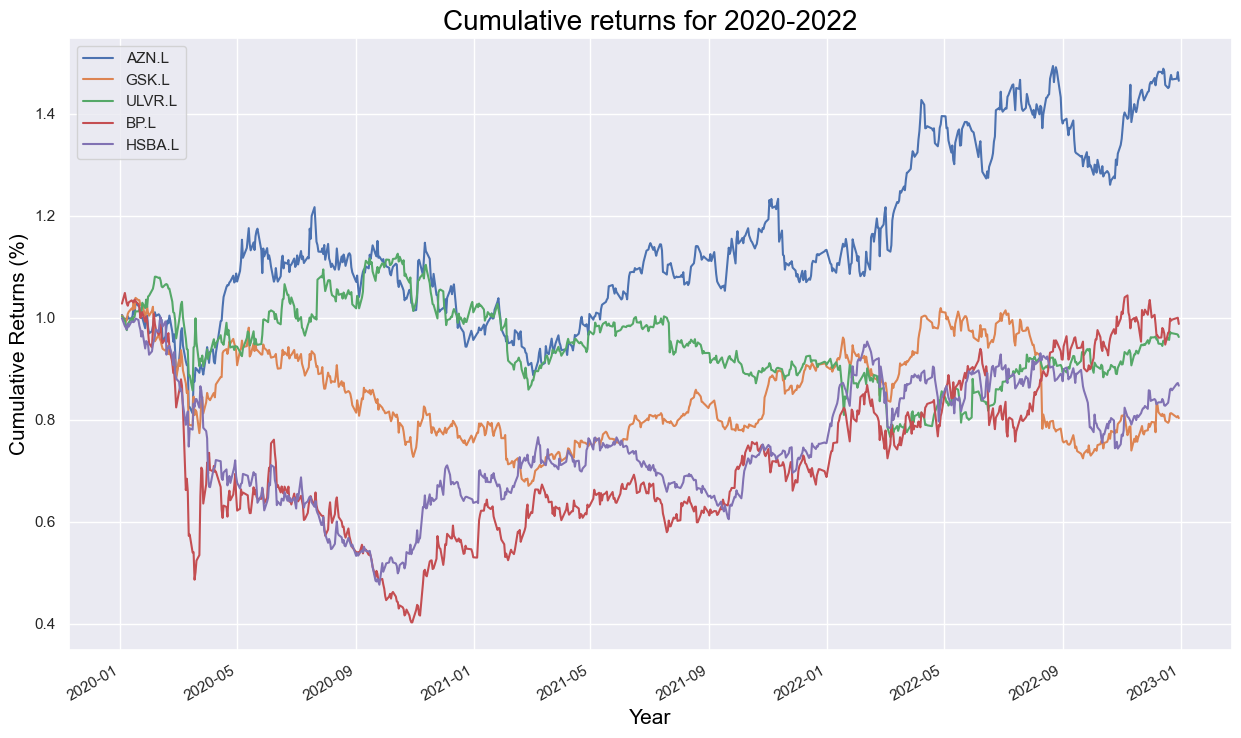

In [25]:
# Plot cumulative returns

cumulative_returns.plot(grid = True)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Cumulative returns for 2020-2022', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Cumulative Returns (%)', color = 'black', fontsize = 15)

## 9. Calculate standard deviation

Standard deviation (σ) is often used by investors to measure the risk of a stock or a stock portfolio, the basic idea being that it is a measure of volatility, or the spread of asset prices from the mean. The higher the volatility, the higher the standard deviation and the riskier the investment, the lower the standard deviation the lower the risk.

In [26]:
# Calculate daily standard deviation for each stock

returns = returns / 100

returns.std()

AZN.L     0.016911
GSK.L     0.015350
ULVR.L    0.014940
BP.L      0.027217
HSBA.L    0.020631
dtype: float64

In [27]:
# Calculate the annualised standard deviation (252 trading days)

returns.std() * np.sqrt(252)

AZN.L     0.268454
GSK.L     0.243674
ULVR.L    0.237168
BP.L      0.432054
HSBA.L    0.327510
dtype: float64

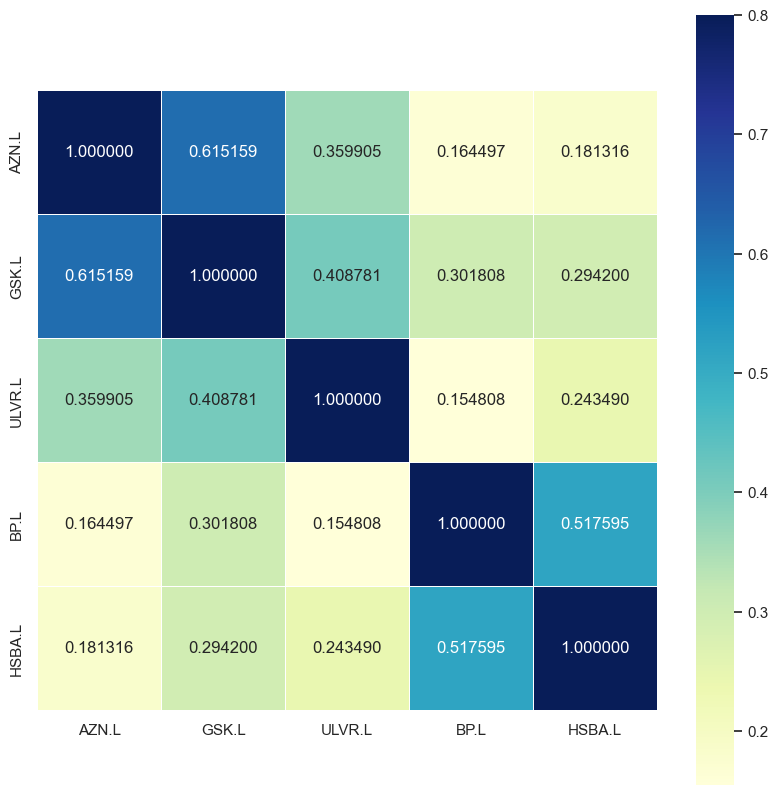

In [28]:
# Plot correlation heatmap

plt.figure(figsize=(10, 10))
sns.heatmap(data = returns.corr(), vmax=.8, linewidths=0.5,  fmt='.6f',
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.show()

The oil stocks, BP.L and RDSB.L, show the highest correlation.

## 10. Exponentially Weighted Moving Average

We will calculate and plot the daily returns using an Exponentially Weighted Moving Average where past values have a diminishing contribution to the average, while more recent values have a greater contribution.

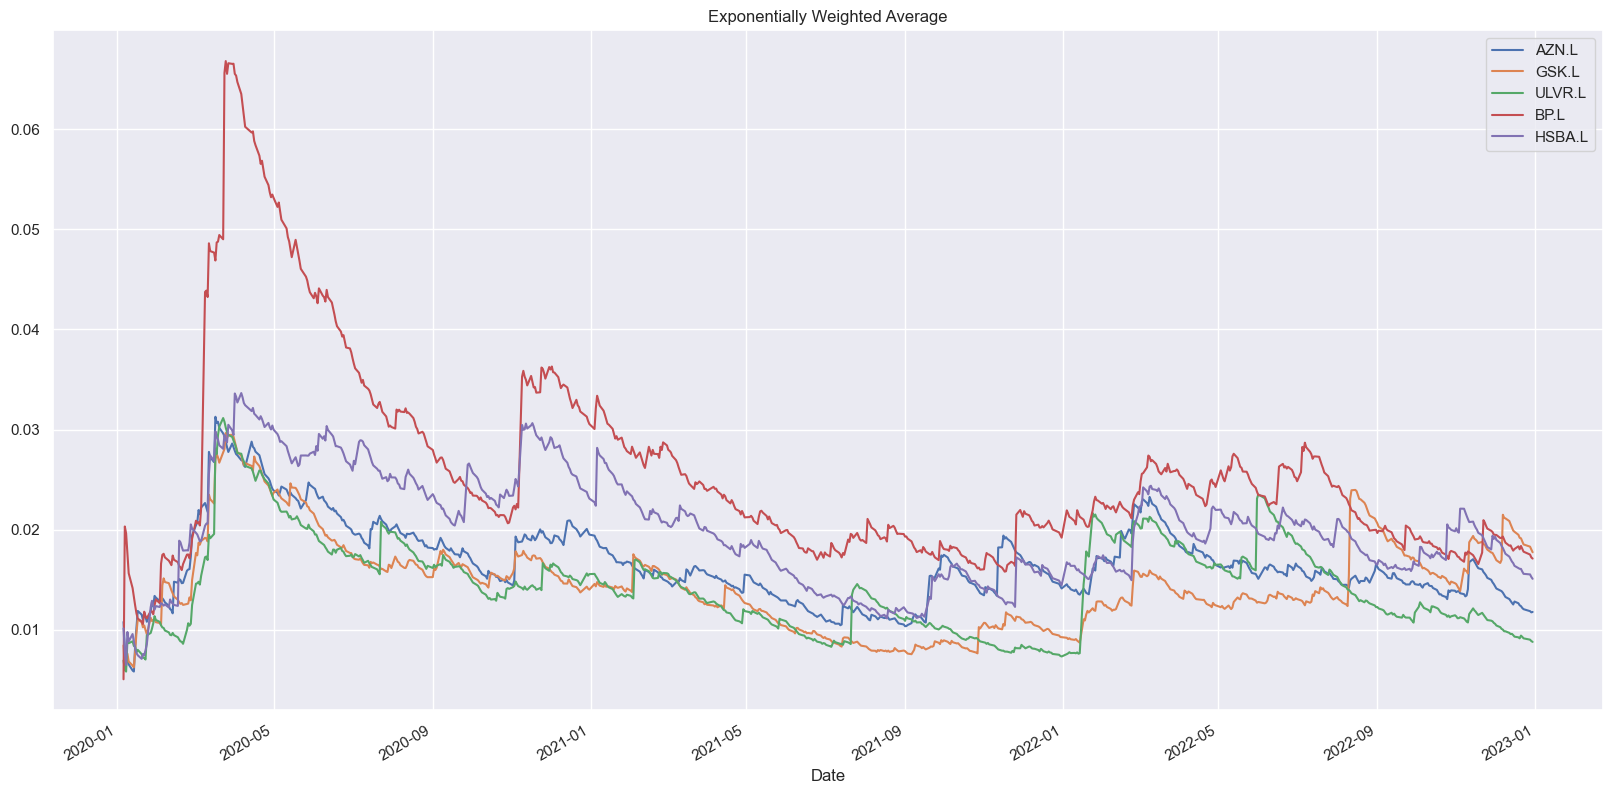

In [29]:
# Calculate a rolling window using the Exponentially Weighted Moving Average. 
returns.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average"); 

## 11. Plot Sharpe Ratios

The Sharpe ratio measures the performance of an investment compared to a risk-free asset, after adjusting for its risk. To calculate it you take the return, subtract the risk-free rate and divide by the volatility of said investment’s returns.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
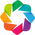

:Bars   [index]   (0)

In [31]:
# Calculate annualised Sharpe Ratios
sharpe_ratios = (returns.mean() * 252) / (returns.std() * np.sqrt(252))
# Visualise the sharpe ratios as a bar plot
sharpe_ratios.hvplot.barh(title="Sharpe Ratios", color= 'red')

For our portfolio the Sharpe ratios are very low. A ratio under 1.0 is considered sub-optimal and the risks taken might be excessive for that level of return.

A negative Sharpe ratio means that the investment return is lower than the risk-free rate, which appears to be the case for HSBA.L, RDSB.L, and BP.L, so investment in a risk-free security would have provided better results.  However, negative Sharpe ratios won't persist for indefinite periods of time, and looking at a wider date range would likely show positive Sharpe ratios for these assets.



## 12. Backtesting
Before using the strategy we will evaluate the quality of it first by backtesting, or looking at how profitable it is on historical data.

### 12.1 Prepare dataframe for metrics

In [32]:
# Prepare DataFrame for metrics

metrics = [
    'HSBA.L Annual Return', 'BP.L Annual Return','ULVR.L Annual Return','GSK.L Annual Return', 'AZN.L Annual Return',
    'HSBA.L Annual Volatility','BP.L Annual Volatility','ULVR.L Annual Volatility','GSK.L Annual Volatility','AZN.L Annual Volatility',
    'HSBA.L Sharpe Ratio', 'BP.L Sharpe Ratio','ULVR.L Sharpe Ratio','GSK.L Sharpe Ratio','AZN.L Sharpe Ratio']
columns = ['Backtest']

# Initialise the DataFrame with index set to evaluation metrics and column as 'Backtest'.

portfolio_evaluation_df = pd.DataFrame(index=metrics, columns=columns)
portfolio_evaluation_df

,Backtest
HSBA.L Annual Return,NaN
BP.L Annual Return,NaN
ULVR.L Annual Return,NaN
GSK.L Annual Return,NaN
AZN.L Annual Return,NaN
HSBA.L Annual Volatility,NaN
BP.L Annual Volatility,NaN
ULVR.L Annual Volatility,NaN
GSK.L Annual Volatility,NaN
AZN.L Annual Volatility,NaN


### 12.2 Perform backtest

Calculate metrics for indicators.

In [33]:
# Calculate annualised return
portfolio_evaluation_df.loc['HSBA.L Annual Return'] = returns['HSBA.L'].std() * np.sqrt(252)
# portfolio_evaluation_df.loc['RDSB.L Annual Return'] = returns['RDSB.L'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['BP.L Annual Return'] = returns['BP.L'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['ULVR.L Annual Return'] = returns['ULVR.L'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['GSK.L Annual Return'] = returns['GSK.L'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['AZN.L Annual Return'] = returns['AZN.L'].std() * np.sqrt(252)
# Calculate annual volatility
portfolio_evaluation_df.loc['HSBA.L Annual Volatility'] = returns['HSBA.L'].std() * np.sqrt(252)
# portfolio_evaluation_df.loc['RDSB.L Annual Volatility'] = returns['RDSB.L'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['BP.L Annual Volatility'] = returns['BP.L'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['ULVR.L Annual Volatility'] = returns['ULVR.L'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['GSK.L Annual Volatility'] = returns['GSK.L'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['AZN.L Annual Volatility'] = returns['AZN.L'].std() * np.sqrt(252)
# Calculate Sharpe Ratio
portfolio_evaluation_df.loc['HSBA.L Sharpe Ratio'] = sharpe_ratios['HSBA.L']
# portfolio_evaluation_df.loc['RDSB.L Sharpe Ratio'] = sharpe_ratios['RDSB.L']
portfolio_evaluation_df.loc['BP.L Sharpe Ratio'] = sharpe_ratios['BP.L']
portfolio_evaluation_df.loc['ULVR.L Sharpe Ratio'] = sharpe_ratios['ULVR.L']
portfolio_evaluation_df.loc['GSK.L Sharpe Ratio'] = sharpe_ratios['GSK.L']
portfolio_evaluation_df.loc['AZN.L Sharpe Ratio'] = sharpe_ratios['AZN.L']
portfolio_evaluation_df.head(18)

,Backtest
HSBA.L Annual Return,0.32751
BP.L Annual Return,0.432054
ULVR.L Annual Return,0.237168
GSK.L Annual Return,0.243674
AZN.L Annual Return,0.268454
HSBA.L Annual Volatility,0.32751
BP.L Annual Volatility,0.432054
ULVR.L Annual Volatility,0.237168
GSK.L Annual Volatility,0.243674
AZN.L Annual Volatility,0.268454


### 12.3 Print dashboard

In [34]:
portfolio_evaluation_df.reset_index(inplace=True)
portfolio_evaluation_table = portfolio_evaluation_df.hvplot.table()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
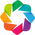

:Table   [index,Backtest]

In [35]:
portfolio_evaluation_table